# Water Bottle Flipping Data Analysis

In [1]:
#%qtconsole
#To get remote console connection info use: %connect_info

import os

# Turn off warnings that pollute the content
import warnings
warnings.filterwarnings('ignore')

# Embed plots in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 0.4
mpl.rcParams['grid.color'] = '#555555'
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '-'
# 3-cycle
#csamp = np.repeat(np.arange(3)/12.0, 3) + np.tile(np.linspace(0, 1, num=4)[:3], 3)
#CMAP = plt.get_cmap('hsv')(csamp).tolist()
#c_cycle = mpl.cycler('color', CMAP)
#mpl.rcParams['axes.prop_cycle'] = c_cycle

# Render plots using SVG format
%config InlineBackend.figure_formats=['svg']
#%config InlineBackend.figure_formats=['png', 'pdf']
#%config InlineBackend.figure_format='png'

import itertools # itertools.product useful for looping n-D combinations
from collections import OrderedDict as OD
import random

# Typeset arbitrary latex math with display(Math('y=x^2')) where y=x^2 is any LaTeX math
from IPython.display import display, Math, Latex, HTML, SVG, Markdown
from IPython.display import Image # Syntax: Image(filename='file', width=wd, height=ht)
# Setup to use breakpt() for droppping into ipdb:
from IPython.core.debugger import Tracer
breakpt = Tracer()

import numpy as np
import pandas as pd
pd.set_option('display.notebook.repr_html', True)
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 80)
pd.set_option('display.width', 80)
pd.set_option('display.precision', 2)

# width x height of figure plots
FIGSIZE = (10,6)

CWD = os.getcwd()

# File that contains results data
DATFILE = 'flip_results_sample_2.csv'


In [2]:
#%qtconsole

## Import Data


In [3]:
data = pd.read_csv(os.path.join(CWD, DATFILE))
data['total_flips'] = data['good_flips'] + data['bad_flips']
data['good_pct'] = 100. * data['good_flips'] / data['total_flips']
data['bad_pct'] = 100. * data['bad_flips'] / data['total_flips']
data

,name,ounces,good_flips,bad_flips,total_flips,good_pct,bad_pct
0,Kyle,2,1,9,10,10.0,90.0
1,Graham,2,2,8,10,20.0,80.0
2,Taylor,2,1,9,10,10.0,90.0
3,Laith,2,1,9,10,10.0,90.0
4,Lois,3,8,2,10,80.0,20.0
5,Aubrey,3,7,3,10,70.0,30.0
6,Marshall,3,6,4,10,60.0,40.0
7,Lois,3,9,1,10,90.0,10.0
8,Kaitlin,4,4,6,10,40.0,60.0
9,Prescott,4,5,5,10,50.0,50.0


## Data Analysis

In [4]:
ozbins = np.arange(21) + 0.5
ozbinax = ozbins[:-1] + 0.5

The histogram on "ounces" shows how many test trials in total
were performed for that many ounces of water.

In [5]:
def histplot(rawhist, title=None, xlabel=None, ylabel=None, colname=0,
             index=ozbinax, plot=True):
    df = pd.DataFrame(data=rawhist[0], index=index, columns=[colname])
    if plot:
        ax = df.plot(kind='bar', title=title, figsize=FIGSIZE, legend=None)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
    return df

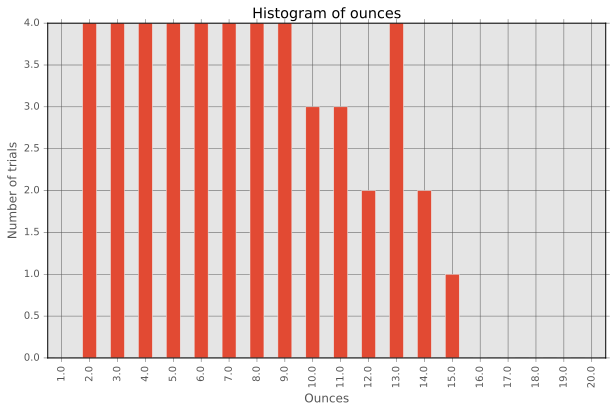

In [6]:
hist_oz = np.histogram(data['ounces'], bins=ozbins)
hist_oz_df = histplot(hist_oz, colname='ounces',
                      title='Histogram of ounces',
                      xlabel='Ounces', ylabel='Number of trials')

In [7]:
def weighted_hist(colname, bincol='ounces', bins=ozbins, normalize=True):
    h1 = np.histogram(data[bincol], bins=bins, weights=data[colname])
    if normalize:
        # Scale by the number of trials for each bin
        h2 = np.histogram(data[bincol], bins=bins)
        hscale = h1[0] / h2[0]
        hscale[np.isnan(hscale)] = 0
        return (hscale, h1[1])
    else:
        return h1


The weighted histogram on flips show us how many total good and flips
there were for each amount of water. To decide how well a given
quantity of water performed it is necessary to consider the number
of bad flips along with the number of good flips.

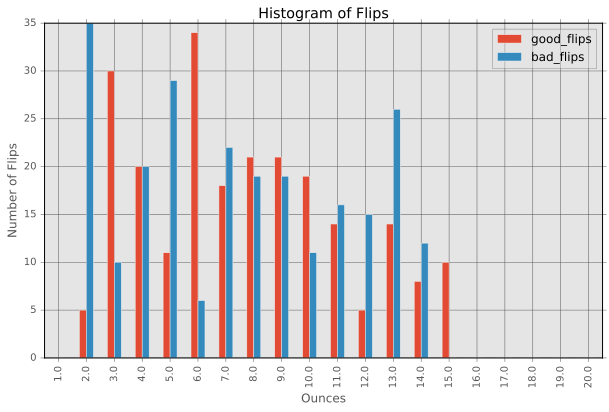

In [8]:
hist_good_flips = weighted_hist('good_flips', normalize=False)
hist_bad_flips = weighted_hist('bad_flips', normalize=False)
hist_good_flips_df = histplot(hist_good_flips, colname='good_flips', plot=False)
hist_bad_flips_df = histplot(hist_bad_flips, colname='bad_flips', plot=False)
hist_flips_df = pd.concat([hist_good_flips_df, hist_bad_flips_df], axis=1)
ax = hist_flips_df.plot(kind='bar', title='Histogram of Flips',
                        figsize=FIGSIZE)
ax.set_xlabel('Ounces')
ax.set_ylabel('Number of Flips')

#                      title='Histogram of Good Flips',
#                      xlabel='Ounces', ylabel='Number of Good Flips')

But looking at the percentages (number of good flips divided by the sum
of the good plus bad flips) we can see which quantity of water had the
best performance. We should also go back to the "Histogram of ounces" to
confirm that a sufficient number of trials were performed before drawing
conclusions.

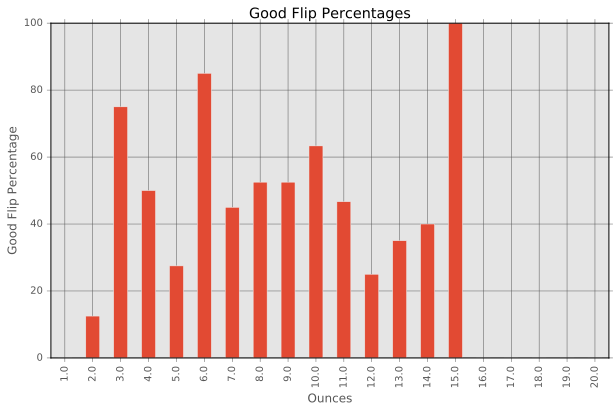

In [9]:
hist_good_pct = weighted_hist('good_pct')
hist_good_pct_df = histplot(hist_good_pct, colname='good_pct',
                      title='Good Flip Percentages',
                      xlabel='Ounces', ylabel='Good Flip Percentage')

For reference we can also look at the bad flip percentages.

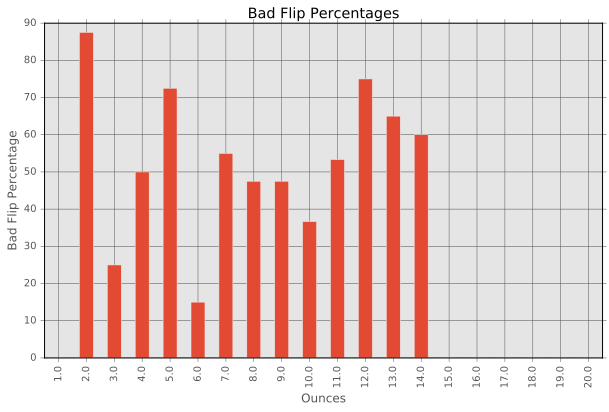

In [10]:
hist_bad_pct = weighted_hist('bad_pct')
hist_bad_pct_df = histplot(hist_bad_pct, colname='bad_pct',
                      title='Bad Flip Percentages',
                      xlabel='Ounces', ylabel='Bad Flip Percentage')

Out of curiosity, what amount of water was flipped the most?

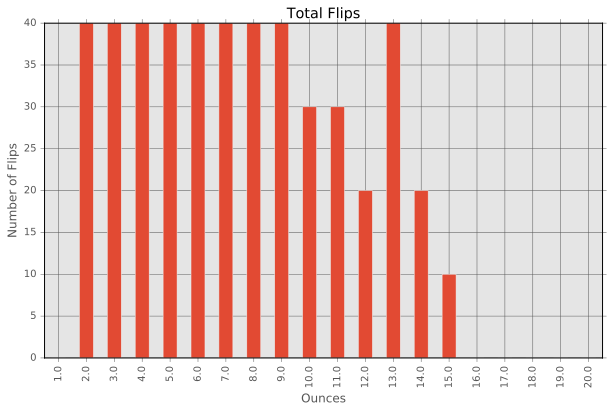

In [11]:
hist_total_flips = weighted_hist('total_flips', normalize=False)
hist_total_flips_df = histplot(hist_total_flips, colname='total_flips', plot=True,
                               title='Total Flips',
                               xlabel='Ounces', ylabel='Number of Flips')



Now instead of making our histograms on the amount of water, let's
use student names as the "bins".

In [12]:
# Convert names to index values for histogram to work with
names = set(data['name'])
nameindex = {v: k + 1 for k, v in enumerate(names)}
data['nameindex'] = [nameindex[i] for i in data['name']]
namebins = np.arange(len(names) + 1) + 0.5
nameindex2 = {v: k for k, v in nameindex.items()}
nameplot = [nameindex2[i + 1] for i in range(len(names))]

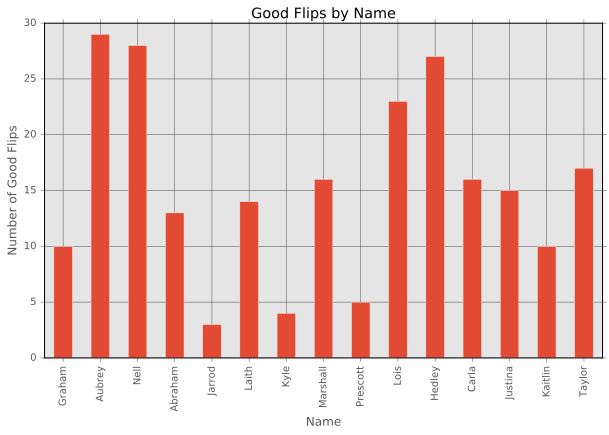

In [13]:
#name_good_flips = np.histogram(data['nameindex'], bins=namebins, weights=data['good_flips'])
name_good_flips = weighted_hist('good_flips', bincol='nameindex', bins=namebins, normalize=False)

name_good_flips_df = histplot(name_good_flips, colname='good_flips',
                              index=nameplot,
                              title='Good Flips by Name',
                              xlabel='Name', ylabel='Number of Good Flips')

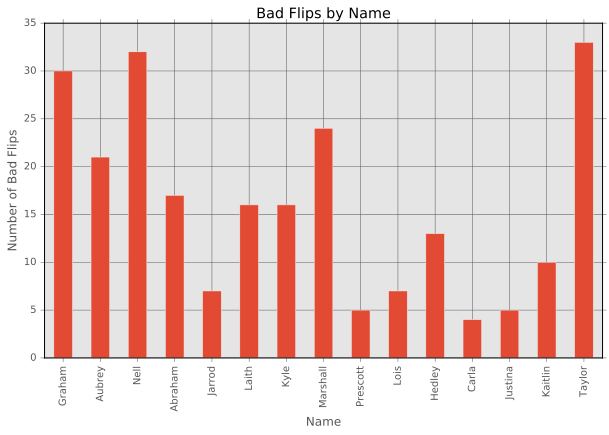

In [14]:
# Failure is to be celebrated and is an expected and necessary part
# of the process, but if you have a student(s) that might melt down over
# having the most number of bad flips, consider skipping this plot
name_bad_flips = weighted_hist('bad_flips', bincol='nameindex', bins=namebins, normalize=False)

name_bad_flips_df = histplot(name_bad_flips, colname='bad_flips',
                              index=nameplot,
                              title='Bad Flips by Name',
                              xlabel='Name', ylabel='Number of Bad Flips')

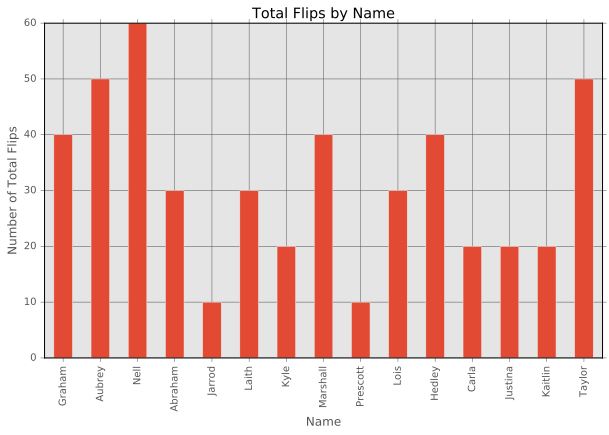

In [15]:
name_total_flips = weighted_hist('total_flips', bincol='nameindex', bins=namebins, normalize=False)
name_total_flips_df = histplot(name_total_flips, colname='total_flips',
                              index=nameplot,
                              title='Total Flips by Name',
                              xlabel='Name', ylabel='Number of Total Flips')

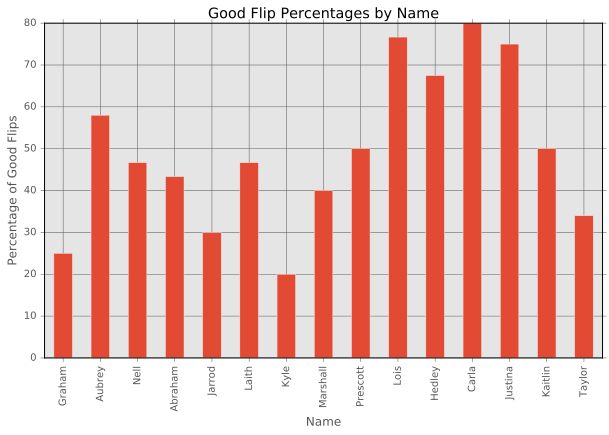

In [16]:
name_good_flips_pct = weighted_hist('good_pct', bincol='nameindex', bins=namebins, normalize=True)

name_good_flips_pct_df = histplot(name_good_flips_pct, colname='good_pct',
                              index=nameplot,
                              title='Good Flip Percentages by Name',
                              xlabel='Name', ylabel='Percentage of Good Flips')

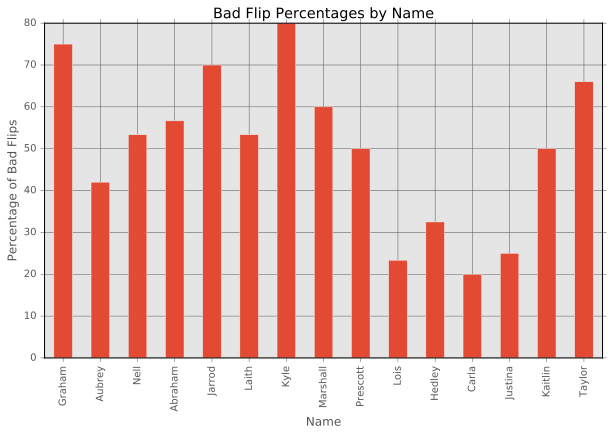

In [17]:
# Again, maybe leave this chart out for sensitive students, but the
# student who recorded the most bad flips is the most diligent experimentalist
name_bad_flips_pct = weighted_hist('bad_pct', bincol='nameindex', bins=namebins, normalize=True)

name_bad_flips_pct_df = histplot(name_bad_flips_pct, colname='bad_pct',
                              index=nameplot,
                              title='Bad Flip Percentages by Name',
                              xlabel='Name', ylabel='Percentage of Bad Flips')